In [1]:
import pandas as pd

url = "https://github.com/Shreyaas14/bac-adv-team/raw/main/stock%200.xlsx"

df = pd.read_excel(url)
df["imbalance_size"] = df["imbalance_size"] * df["imbalance_buy_sell_flag"]
df

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.000000,-3.029704,0,0_0_0
1,0,0,10,1299772.70,1,1.000026,15261106.63,NaN,NaN,0.999812,13996.50,1.000026,23519.16,0.999892,0.389814,1,0_10_0
2,0,0,20,1299772.70,1,0.999919,15261106.63,NaN,NaN,0.999812,4665.50,0.999919,12131.60,0.999842,4.220009,2,0_20_0
3,0,0,30,1299772.70,1,1.000133,15261106.63,NaN,NaN,1.000026,55998.00,1.000133,46203.30,1.000085,5.450249,3,0_30_0
4,0,0,40,1218204.43,1,1.000455,15342674.90,NaN,NaN,1.000241,14655.95,1.000455,26610.45,1.000317,3.169775,4,0_40_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5401,0,98,110,1532025.15,1,1.000731,16105487.38,NaN,NaN,1.000515,18723.38,1.000731,21972.27,1.000615,2.969503,5401,98_110_0
5402,0,98,120,1532025.15,1,1.000731,16105487.38,NaN,NaN,1.000407,10287.48,1.000731,23826.47,1.000505,3.759861,5402,98_120_0
5403,0,98,130,1532025.15,1,1.000731,16105487.38,NaN,NaN,1.000515,16776.89,1.000731,24475.44,1.000603,3.850460,5403,98_130_0
5404,0,98,140,1532025.15,1,1.000731,16105487.38,NaN,NaN,1.000515,21226.01,1.000731,12423.14,1.000651,-0.150204,5404,98_140_0


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

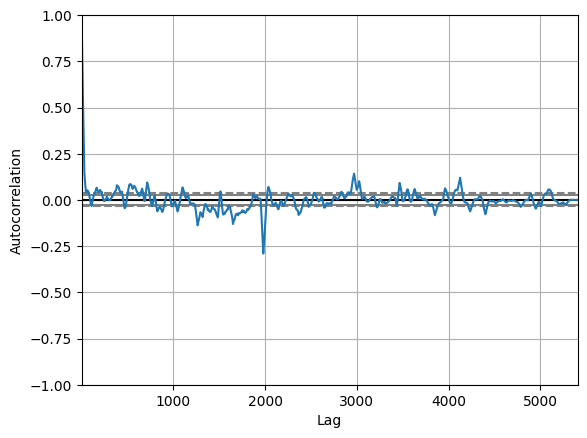

In [2]:
pd.plotting.autocorrelation_plot(df["imbalance_size"])

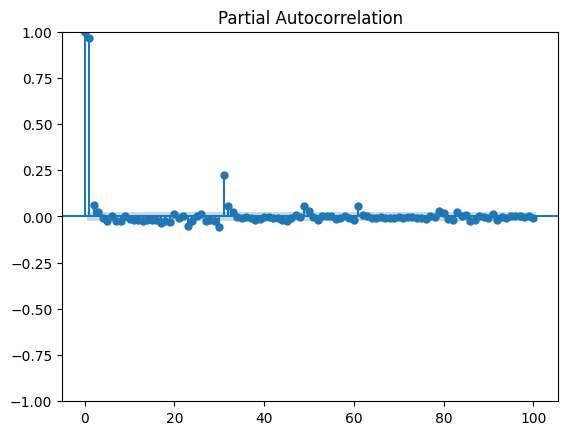

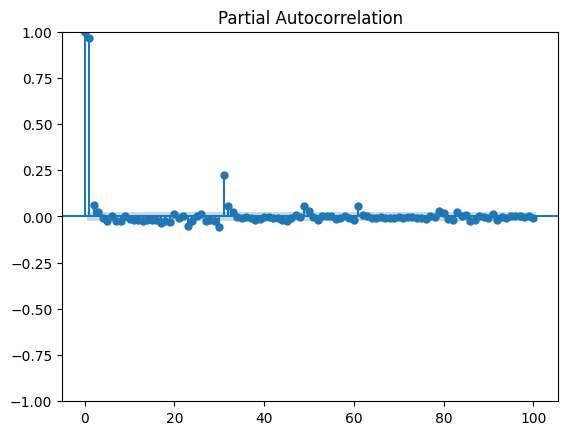

In [3]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df["imbalance_size"], lags = 100)

In [4]:
import statsmodels as sm
from statsmodels.tsa.arima.model import ARIMA

p, d, q = 1, 0, 2

X = df["imbalance_size"]
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)].reset_index(drop=True)
history = [x for x in train]
predictions = list()

for t in range(len(test)):
	break
	model = sm.tsa.arima.model.ARIMA(history, order=(p,d,q))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print(t, len(test)) #'predicted=%f, expected=%f' % (yhat, obs))

(4000.0, 4800.0)

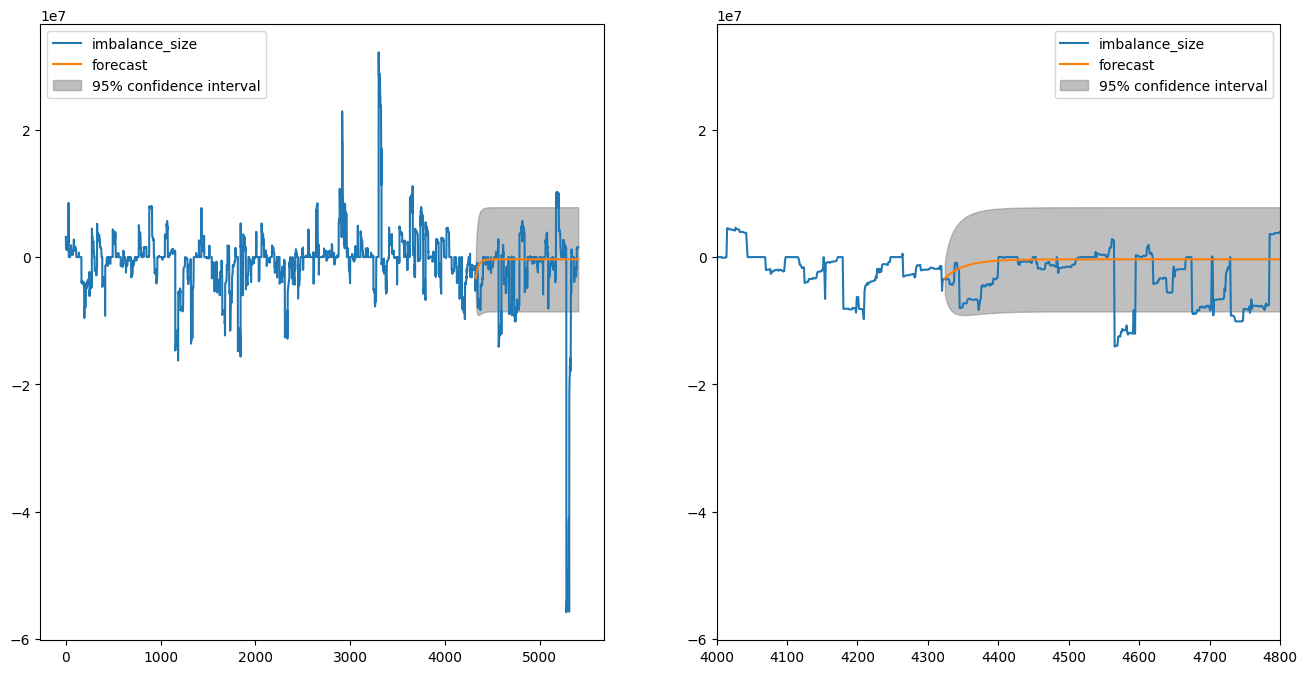

In [72]:
import statsmodels as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

p, d, q = 1, 0, 2

X = df["imbalance_size"]
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]

fit = sm.tsa.arima.model.ARIMA(train, order=(p,d,q)).fit()
fit_testdata = fit.extend(test)

#plotting
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
ax[0] = X.plot(ax=ax[0])
plot_predict(fit_testdata, dynamic=True, ax=ax[0])
plt.xlim(4000, 4400)

ax[1] = X.plot(ax=ax[1])
plot_predict(fit_testdata, dynamic=True, ax=ax[1])
plt.xlim(4000, 4800)